In [40]:
VN30_2019 = ["VNM",'TCB','VIC','MSN','HPG','VPB','VHM','VJC',
             'MWG','MBB','SAB','VCB','HDB','FPT','STB','NVL',
             'EIB','VRE','PNJ','GAS','SSI','CTG','GMD','CTD',
             'ROS','REE','SBT','CII','DPM','DHG']

In [41]:
from vnstock3 import Vnstock
import pandas as pd
import numpy as np
from scipy import stats

In [42]:
# Fetch historical data for VN30
vnindex_data = Vnstock().stock(symbol='VN30')
vnindex_data = vnindex_data.quote.history(start='2017-08-24', end='2019-01-03')
vnindex_data['Return'] = vnindex_data['close'].pct_change()

beta_values = {}

2024-08-18 12:10:06,491 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS


In [43]:
for symbol in VN30_2019:
    # Fetch historical data for each stock in VN30
    stock_data = Vnstock().stock(symbol=symbol)
    stock_data = stock_data.quote.history(start='2017-08-24', end='2019-01-03')
    stock_data['Return'] = stock_data['close'].pct_change()

    # Merge the dataframes on date
    merged_data = pd.merge(stock_data[['time', 'Return']], vnindex_data[['time', 'Return']], on='time', suffixes=('_STOCK', '_VN30'))
    merged_data.dropna(inplace=True)  # Drop rows with NaN values

    # Perform linear regression to calculate beta
    if not merged_data.empty:
        beta, alpha, r_value, p_value, std_err = stats.linregress(merged_data['Return_VN30'], merged_data['Return_STOCK'])
        beta_values[symbol] = beta

2024-08-18 12:10:06,809 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-08-18 12:10:07,229 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-08-18 12:10:07,416 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-08-18 12:10:07,691 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-08-18 12:10:07,980 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-08-18 12:10:08,234 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-08-18 12:10:08,455 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-08-18 12:10:08,634 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yế

In [44]:
beta_values

{'VNM': np.float64(0.5965937688405157),
 'TCB': np.float64(1.0764264817117575),
 'VIC': np.float64(0.8241595078508411),
 'MSN': np.float64(1.1045779494272328),
 'HPG': np.float64(1.179324276052169),
 'VPB': np.float64(1.4417196755697967),
 'VHM': np.float64(0.3731951135562362),
 'VJC': np.float64(1.0280246438457112),
 'MWG': np.float64(1.017259845267381),
 'MBB': np.float64(1.2976559985608098),
 'SAB': np.float64(0.5108835789475535),
 'VCB': np.float64(1.3703396896137796),
 'HDB': np.float64(1.0938806410374688),
 'FPT': np.float64(0.9342534417597422),
 'STB': np.float64(1.2614676897495662),
 'NVL': np.float64(0.4187236086612735),
 'EIB': np.float64(0.48604185208301937),
 'VRE': np.float64(1.0631064938536783),
 'PNJ': np.float64(1.1110074409194763),
 'GAS': np.float64(1.435426662604883),
 'SSI': np.float64(1.461968187789989),
 'CTG': np.float64(1.6268810427271),
 'GMD': np.float64(0.8620222896541818),
 'CTD': np.float64(0.7046146819435494),
 'ROS': np.float64(0.8884887015298932),
 'REE'

In [45]:
vnindex_data

,time,open,high,low,close,volume,Return
0,2017-08-24 07:00:00,743.23,749.82,742.34,747.72,33630890,NaN
1,2017-08-25 07:00:00,746.87,751.14,746.87,751.14,32784240,0.004574
2,2017-08-28 07:00:00,751.59,758.02,749.20,758.02,42763860,0.009159
3,2017-08-29 07:00:00,757.84,758.76,754.59,754.59,44549640,-0.004525
4,2017-08-30 07:00:00,756.49,764.57,755.32,764.57,34232490,0.013226
...,...,...,...,...,...,...,...
335,2018-12-25 07:00:00,873.56,873.56,850.33,865.69,51475970,-0.009100
336,2018-12-26 07:00:00,865.96,867.88,860.52,861.02,32704590,-0.005395
337,2018-12-27 07:00:00,861.53,872.73,861.53,865.45,35751060,0.005145
338,2018-12-28 07:00:00,866.04,868.62,854.99,854.99,38254570,-0.012086


In [46]:
def calculate_return(df):
    if df.empty:
        return 0
    first_price = df['close'].iloc[0]
    final_price = df['close'].iloc[-1] 
    stock_return = ((final_price - first_price)/first_price) * 100
    return stock_return

In [47]:
stock_return = {}

for stock in VN30_2019:
    stock_data = Vnstock().stock(symbol=stock)
    stock_data = stock_data.quote.history(start='2017-08-24', end='2019-01-03')
    return_rate = calculate_return(stock_data)
    stock_return[stock] = return_rate


2024-08-18 12:10:13,807 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-08-18 12:10:14,029 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-08-18 12:10:14,214 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-08-18 12:10:14,437 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-08-18 12:10:14,988 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-08-18 12:10:15,216 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-08-18 12:10:15,407 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-08-18 12:10:15,592 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yế

In [48]:
stock_return

{'VNM': np.float64(4.116161616161604),
 'TCB': np.float64(-25.01510574018127),
 'VIC': np.float64(178.9934354485777),
 'MSN': np.float64(70.8758731864589),
 'HPG': np.float64(27.937336814621418),
 'VPB': np.float64(-13.448735019973364),
 'VHM': np.float64(-16.858297078931013),
 'VJC': np.float64(62.00586674116496),
 'MWG': np.float64(9.665579119086464),
 'MBB': np.float64(8.36820083682008),
 'SAB': np.float64(0.5166744950681045),
 'VCB': np.float64(49.65337954939342),
 'HDB': np.float64(-26.149914821124366),
 'FPT': np.float64(4.279891304347819),
 'STB': np.float64(-1.276595744680854),
 'NVL': np.float64(34.975554719819485),
 'EIB': np.float64(17.18009478672987),
 'VRE': np.float64(-13.001555209953345),
 'PNJ': np.float64(35.51020408163266),
 'GAS': np.float64(51.54872828003022),
 'SSI': np.float64(16.71525753158407),
 'CTG': np.float64(4.2763157894736805),
 'GMD': np.float64(-14.559234144395687),
 'CTD': np.float64(-20.92889908256882),
 'ROS': np.float64(-54.11018530033578),
 'REE': n

In [49]:
stock_return_series = pd.Series(stock_return)
market_return = stock_return_series.mean()/100
market_return

np.float64(0.1016777394545934)

In [50]:
risk_free = [0.0598, 0.0471]
risk_free = pd.Series(risk_free)
R_f = risk_free.mean()
R_f

np.float64(0.05345)

In [51]:
df = pd.DataFrame(list(beta_values.items()), columns=['Stock', 'Beta'])

# Calculate the expected return using the CAPM formula
df['Expected Return'] = R_f + df['Beta'] * (market_return - R_f) *100
df

,Stock,Beta,Expected Return
0,VNM,0.596594,2.930687
1,TCB,1.076426,5.244812
2,VIC,0.824160,4.028185
3,MSN,1.104578,5.380580
4,HPG,1.179324,5.741064
5,VPB,1.441720,7.006538
6,VHM,0.373195,1.853286
7,VJC,1.028025,5.011380
8,MWG,1.017260,4.959464
9,MBB,1.297656,6.311752


In [52]:
top5_return = df.sort_values(by='Expected Return', ascending=False).head(5)
least_return = df.sort_values(by='Expected Return').head(5)
return_sorted = df.sort_values(by='Expected Return').reset_index(drop=True)
median_index = len(return_sorted) // 2
if len(return_sorted) % 2 == 0:
    median_stocks = return_sorted.iloc[median_index-2:median_index+3]
else:
    median_stocks = return_sorted.iloc[median_index-2:median_index+3]

print(median_stocks)
print(top5_return)
print(least_return)

   Stock      Beta  Expected Return
13   FPT  0.934253         4.559143
14   REE  0.966392         4.714140
15   MWG  1.017260         4.959464
16   VJC  1.028025         5.011380
17   VRE  1.063106         5.180572
   Stock      Beta  Expected Return
21   CTG  1.626881         7.899530
20   SSI  1.461968         7.104192
5    VPB  1.441720         7.006538
19   GAS  1.435427         6.976188
11   VCB  1.370340         6.662289
   Stock      Beta  Expected Return
6    VHM  0.373195         1.853286
27   CII  0.410483         2.033118
15   NVL  0.418724         2.072859
16   EIB  0.486042         2.397520
10   SAB  0.510884         2.517326


In [53]:
top5_beta = df.sort_values(by='Beta', ascending=False).head(5)
least_beta = df.sort_values(by='Beta').head(5)
beta_sorted = df.sort_values(by='Beta').reset_index(drop=True)
median_index = len(beta_sorted) // 2
if len(beta_sorted) % 2 == 0:
    median_beta = beta_sorted.iloc[median_index-2:median_index+3]
else:
    median_beta = beta_sorted.iloc[median_index-2:median_index+3]

print(median_beta)
print(top5_beta)
print(least_beta)

   Stock      Beta  Expected Return
13   FPT  0.934253         4.559143
14   REE  0.966392         4.714140
15   MWG  1.017260         4.959464
16   VJC  1.028025         5.011380
17   VRE  1.063106         5.180572
   Stock      Beta  Expected Return
21   CTG  1.626881         7.899530
20   SSI  1.461968         7.104192
5    VPB  1.441720         7.006538
19   GAS  1.435427         6.976188
11   VCB  1.370340         6.662289
   Stock      Beta  Expected Return
6    VHM  0.373195         1.853286
27   CII  0.410483         2.033118
15   NVL  0.418724         2.072859
16   EIB  0.486042         2.397520
10   SAB  0.510884         2.517326


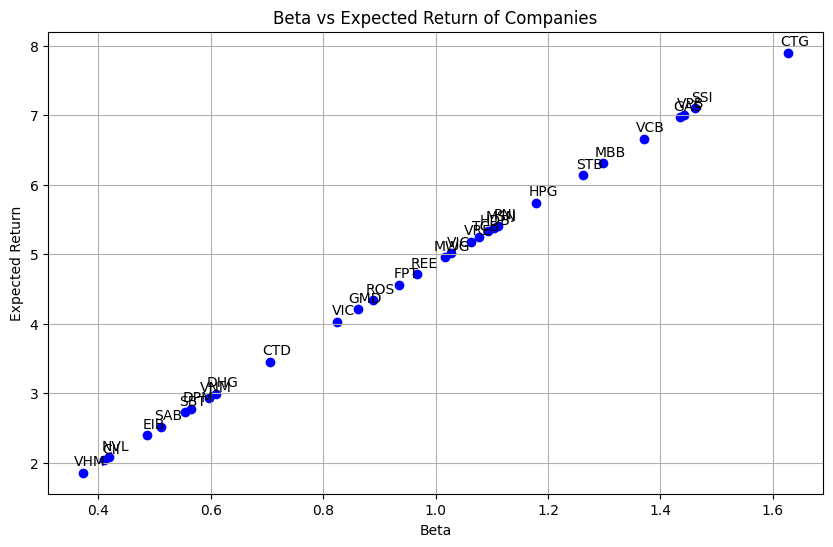

In [54]:
import matplotlib.pyplot as plt

# Plotting the chart with Beta on x-axis and Expected Return on y-axis
plt.figure(figsize=(10, 6))
plt.scatter(df['Beta'], df['Expected Return'], color='blue')

for i, txt in enumerate(df['Stock']):
    plt.annotate(txt, (df['Beta'][i], df['Expected Return'][i]), textcoords="offset points", xytext=(5,5), ha='center')

plt.title('Beta vs Expected Return of Companies')
plt.xlabel('Beta')
plt.ylabel('Expected Return')
plt.grid(True)
plt.show()

In [55]:
real_return = {}
for stock in VN30_2019:
    stock_data = Vnstock().stock(symbol=stock)
    stock_data = stock_data.quote.history(start='2017-08-24', end='2019-01-03')
    return_rate = calculate_return(stock_data)
    real_return[stock] = return_rate

2024-08-18 12:10:22,336 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS


2024-08-18 12:10:22,624 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-08-18 12:10:22,806 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-08-18 12:10:23,035 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-08-18 12:10:23,247 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-08-18 12:10:23,455 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-08-18 12:10:23,661 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-08-18 12:10:23,848 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-08-18 12:10:24,060 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yế

In [56]:
real_stock_return = pd.Series(real_return)
real_stock_return = pd.DataFrame(real_stock_return, columns=['Return'])
real_stock_return

,Return
VNM,4.116162
TCB,-25.015106
VIC,178.993435
MSN,70.875873
HPG,27.937337
VPB,-13.448735
VHM,-16.858297
VJC,62.005867
MWG,9.665579
MBB,8.368201


In [57]:
real_stock_return.sort_values(by='Return', ascending=False).head(10)

,Return
VIC,178.993435
MSN,70.875873
VJC,62.005867
GAS,51.548728
VCB,49.653380
PNJ,35.510204
NVL,34.975555
HPG,27.937337
EIB,17.180095
SSI,16.715258


C:\Users\Admin\AppData\Local\Temp\ipykernel_356\2039225582.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (df['Beta'][i], real_stock_return['Return'][i]), textcoords="offset points", xytext=(5,5), ha='center')


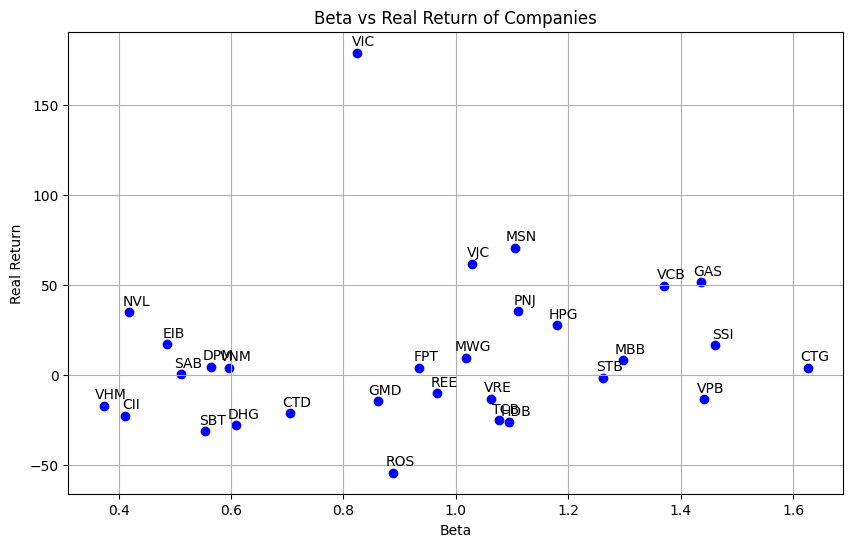

In [58]:
# Plotting the chart with Beta on x-axis and Expected Return on y-axis
plt.figure(figsize=(10, 6))
plt.scatter(df['Beta'], real_stock_return['Return'], color='blue')

for i, txt in enumerate(df['Stock']):
    plt.annotate(txt, (df['Beta'][i], real_stock_return['Return'][i]), textcoords="offset points", xytext=(5,5), ha='center')

plt.title('Beta vs Real Return of Companies')
plt.xlabel('Beta')
plt.ylabel('Real Return')
plt.grid(True)
plt.show()

In [59]:
real_stock_return['Return']

VNM      4.116162
TCB    -25.015106
VIC    178.993435
MSN     70.875873
HPG     27.937337
VPB    -13.448735
VHM    -16.858297
VJC     62.005867
MWG      9.665579
MBB      8.368201
SAB      0.516674
VCB     49.653380
HDB    -26.149915
FPT      4.279891
STB     -1.276596
NVL     34.975555
EIB     17.180095
VRE    -13.001555
PNJ     35.510204
GAS     51.548728
SSI     16.715258
CTG      4.276316
GMD    -14.559234
CTD    -20.928899
ROS    -54.110185
REE    -10.030864
SBT    -30.913140
CII    -22.368421
DPM      4.806202
DHG    -27.730590
Name: Return, dtype: float64

In [60]:
real_stock_return

,Return
VNM,4.116162
TCB,-25.015106
VIC,178.993435
MSN,70.875873
HPG,27.937337
VPB,-13.448735
VHM,-16.858297
VJC,62.005867
MWG,9.665579
MBB,8.368201


In [61]:
new_df = df.set_index('Stock')[['Expected Return']]
new_df

,Expected Return
Stock,
VNM,2.930687
TCB,5.244812
VIC,4.028185
MSN,5.380580
HPG,5.741064
VPB,7.006538
VHM,1.853286
VJC,5.011380
MWG,4.959464


In [62]:
concatenated_df = pd.concat([real_stock_return, new_df], axis=1)
concatenated_df

,Return,Expected Return
VNM,4.116162,2.930687
TCB,-25.015106,5.244812
VIC,178.993435,4.028185
MSN,70.875873,5.380580
HPG,27.937337,5.741064
VPB,-13.448735,7.006538
VHM,-16.858297,1.853286
VJC,62.005867,5.011380
MWG,9.665579,4.959464
MBB,8.368201,6.311752


In [63]:
concatenated_df['Deviation'] = concatenated_df['Return'] - concatenated_df['Expected Return']
variance_deviation = concatenated_df['Deviation'].var()
std_deviation = concatenated_df['Deviation'].std()


In [64]:
print(variance_deviation)
print(std_deviation)

1869.2557168473963
43.234890040884764


In [65]:
concatenated_df

,Return,Expected Return,Deviation
VNM,4.116162,2.930687,1.185475
TCB,-25.015106,5.244812,-30.259917
VIC,178.993435,4.028185,174.965250
MSN,70.875873,5.380580,65.495293
HPG,27.937337,5.741064,22.196272
VPB,-13.448735,7.006538,-20.455273
VHM,-16.858297,1.853286,-18.711583
VJC,62.005867,5.011380,56.994486
MWG,9.665579,4.959464,4.706115
MBB,8.368201,6.311752,2.056449


In [70]:
concatenated_df.sort_values(by='Deviation')

,Return,Expected Return,Deviation
ROS,-54.110185,4.338430,-58.448615
SBT,-30.913140,2.726587,-33.639727
HDB,-26.149915,5.328989,-31.478904
DHG,-27.730590,2.990617,-30.721206
TCB,-25.015106,5.244812,-30.259917
CII,-22.368421,2.033118,-24.401539
CTD,-20.928899,3.451647,-24.380546
VPB,-13.448735,7.006538,-20.455273
GMD,-14.559234,4.210789,-18.770023
VHM,-16.858297,1.853286,-18.711583
